In [1]:
# This script builds and trains a Multi-Layer Perceptron (MLP) regressor using Keras
# to predict median house values from the California Housing dataset.
# The model uses a feedforward neural network architecture with one or more hidden layers.
# The dataset features include median income, house age, average rooms, location data, etc.
# The target is a continuous value (house price), so the output layer uses a single neuron with linear activation.

from sklearn.datasets import fetch_california_housing  # Load the California housing dataset
from sklearn.model_selection import train_test_split    # Tool to split data into train/validation/test sets
from sklearn.preprocessing import StandardScaler        # Tool to scale features to standard normal distribution

# Load the dataset (features and target)
housing = fetch_california_housing()

# Split data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

# Further split training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Standardize the features: zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)      # Fit on training data and transform it
X_valid = scaler.transform(X_valid)          # Use the same transformation on validation data
X_test = scaler.transform(X_test)            # Use the same transformation on test data

Epoch 1/20


d:\hands_on_machine_learning\C10 - Artificial Neural Networks with Keras\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6627 - val_loss: 0.5667
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5520 - val_loss: 0.4681
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4519 - val_loss: 0.4402
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4650 - val_loss: 0.4300
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4087 - val_loss: 0.4161
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4268 - val_loss: 0.4025
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4224 - val_loss: 0.3932
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3934 - val_loss: 0.3872
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4044 - val_loss: 0.3845
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3882 - val_loss: 0.3789
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3666 - val_loss: 0.3699
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

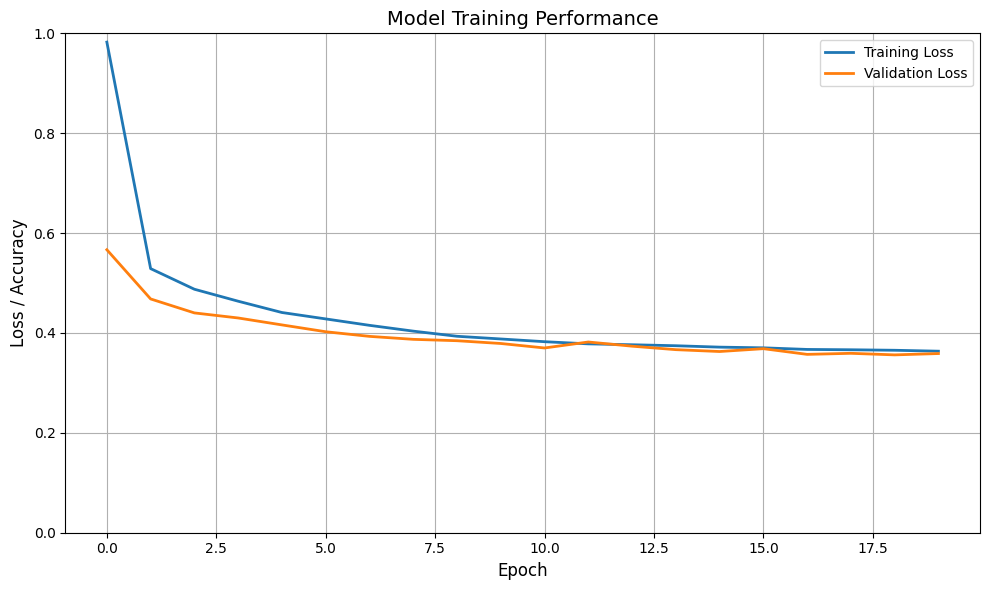

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

The mean squared error is: 0.3846

The prediction of these 3 instances is:
[[1.3810108]
 [0.5423872]
 [1.1859899]]


In [ ]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

# Define a simple feedforward neural network using Keras Sequential API
model = keras.models.Sequential([
    # First hidden layer with 30 neurons and ReLU activation
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    # Output layer with 1 neuron for regression (no activation = linear)
    keras.layers.Dense(1)
])

# Define a function that compiles, trains, and evaluates a regression model
def model_compile_eval(model, train_feat, train_labels, test_feat, test_labels, val_feat, val_labels):

    # Create a Stochastic Gradient Descent optimizer with a learning rate of 0.01
    # and gradient clipping by norm to prevent exploding gradients during training
    optimizer = keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.0)

    # Compile the model using Mean Squared Error (MSE) as the loss function
    # and Stochastic Gradient Descent (SGD) as the optimizer
    model.compile(loss="mean_squared_error", optimizer=optimizer)

    # Train the model for 20 epochs on the training data
    # Validate its performance on the validation set after each epoch
    history = model.fit(train_feat, train_labels, epochs=20, validation_data=(val_feat, val_labels))

    # Evaluate the trained model on the test data to get the final MSE
    mse_test = model.evaluate(test_feat, test_labels)

    # Convert the training history to a DataFrame
    history_df = pd.DataFrame(history.history)

    # Create a figure and plot
    plt.figure(figsize=(10, 6))
    plt.plot(history_df["loss"], label="Training Loss", linewidth=2)
    if "val_loss" in history_df:
        plt.plot(history_df["val_loss"], label="Validation Loss", linewidth=2)

    # Optional: If you're tracking accuracy too
    if "accuracy" in history_df:
        plt.plot(history_df["accuracy"], label="Training Accuracy", linestyle="--")
    if "val_accuracy" in history_df:
        plt.plot(history_df["val_accuracy"], label="Validation Accuracy", linestyle="--")

    # Add titles and labels
    plt.title("Model Training Performance", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss / Accuracy", fontsize=12)

    # Set y-axis limits if appropriate (useful for accuracy metrics)
    plt.ylim(0, 1)

    # Add a grid, legend, and display the plot
    plt.grid(True)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

    # Return the training history and the test set MSE
    return history, mse_test

# Call the function to compile, train, and evaluate the model
history, mse_test = model_compile_eval(model, X_train, y_train, X_test, y_test, X_valid, y_valid)

# Select the first 3 samples from the test set to simulate new/unseen input data
X_new = X_test[:3]

# Predict the target (house prices) for the selected instances
y_pred = model.predict(X_new)

# Print results
print(f"\nThe mean squared error is: {mse_test:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred}")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1929 - val_loss: 0.4817
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4964 - val_loss: 0.4443
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4374 - val_loss: 0.4141
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4008 - val_loss: 0.3892
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3994 - val_loss: 0.3691
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3738 - val_loss: 0.3619
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3612 - val_loss: 0.3691
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3736 - val_loss: 0.3489
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3655 - val_loss: 0.3477
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3499 - val_loss: 0.3393
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3432 - val_loss: 0.3602
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

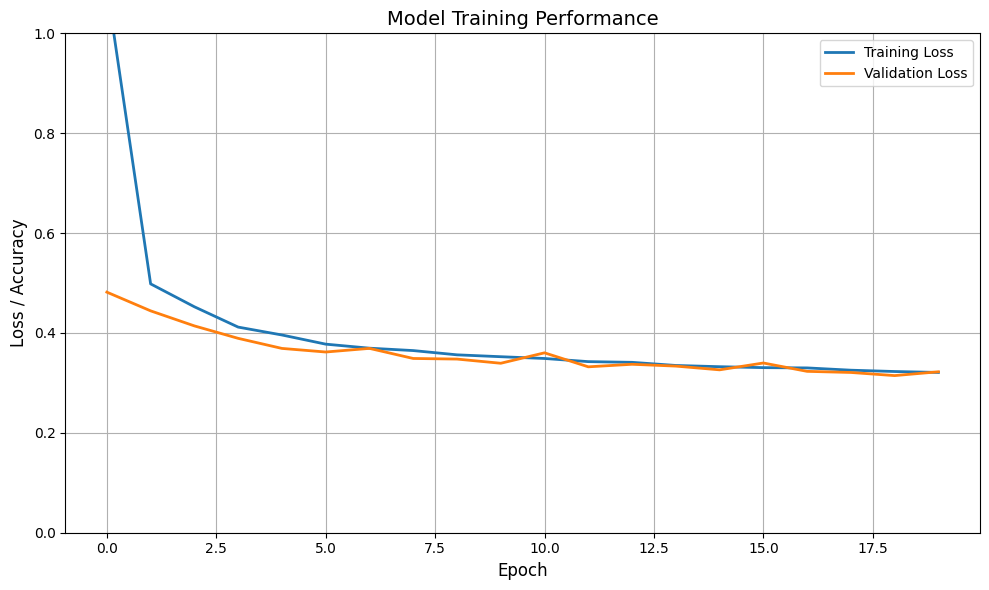

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step

The mean squared error is: 0.3399

The prediction of these 3 instances is:
[[1.5688473 ]
 [0.38808617]
 [0.9142062 ]]


In [12]:
# Let's build a nonsequential neural network using the functional API

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_new = scaler.transform(X_new)

# Define the input layer with the same number of features as the training data
input_ = keras.layers.Input(shape=X_train.shape[1:])

# First hidden layer with 30 neurons and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

# Second hidden layer with 30 neurons and ReLU, taking output from hidden1
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the original input and the output of the second hidden layer
# This allows the model to use both raw input and processed features
concat = keras.layers.Concatenate()([input_, hidden2])

# Output layer with 1 neuron for regression (predicting a single continuous value)
output = keras.layers.Dense(1)(concat)

# Build the full model by specifying the input and output
model_nonseq = keras.Model(inputs=input_, outputs=output)

# Call the function to compile, train, and evaluate the model
history_nonseq, mse_test_nonseq = model_compile_eval(model_nonseq, X_train, y_train, X_test, y_test, X_valid, y_valid)

# Predict the target (house prices) for the selected instances
y_pred_nonseq = model_nonseq.predict(X_new)

# Print results
print(f"\nThe mean squared error is: {mse_test_nonseq:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred_nonseq}")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5438 - val_loss: 0.5584
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7187 - val_loss: 0.5124
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5183 - val_loss: 0.4663
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4950 - val_loss: 0.4347
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4219 - val_loss: 0.3998
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3983 - val_loss: 0.3803
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4094 - val_loss: 0.3689
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4118 - val_loss: 0.3779
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3830 - val_loss: 0.3590
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3745 - val_loss: 0.3557
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3637 - val_loss: 0.3496
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

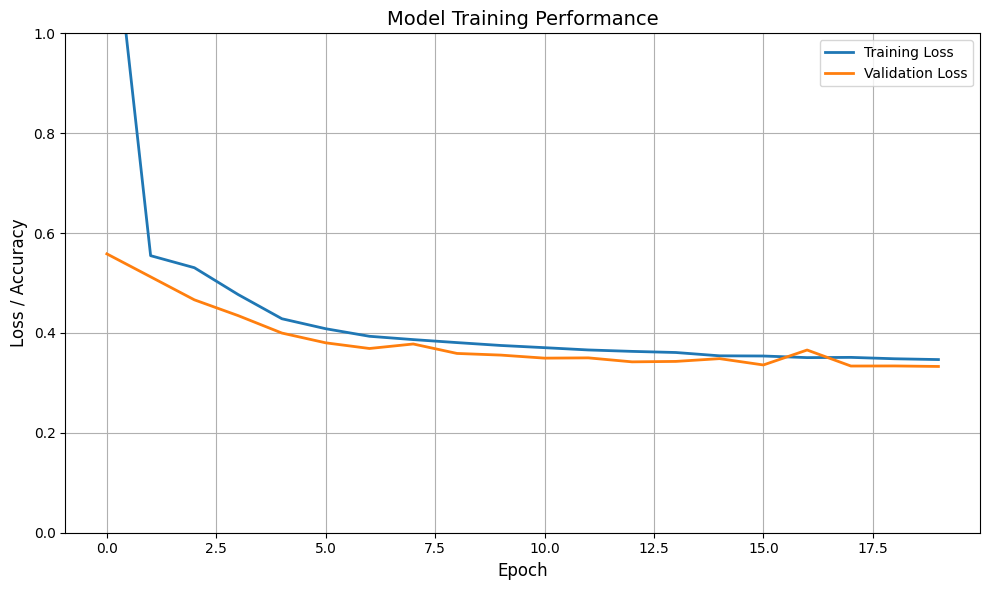

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

The mean squared error is: 0.3789

The prediction of these 3 instances is:
[[1.3929198 ]
 [0.28722882]
 [0.74355125]]


In [13]:
# Let's now take a new approach and send a subset of the features through the wide path
# and a different subset through the deep path

# Define the "wide" input layer with 5 features
input_A = keras.layers.Input(shape=[5], name="wide_input")

# Define the "deep" input layer with 6 features
input_B = keras.layers.Input(shape=[6], name="deep_input")

# First hidden layer for the deep path with 30 neurons and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

# Second hidden layer in the deep path, also with 30 neurons and ReLU
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the wide input and the output of the deep path
# This combines both raw features (wide) and learned features (deep)
concat = keras.layers.concatenate([input_A, hidden2])

# Final output layer with 1 neuron (for regression or binary classification)
output = keras.layers.Dense(1, name="output")(concat)

# Define the full model with two inputs and one output
model_wide_deep = keras.Model(inputs=[input_A, input_B], outputs=[output])

# Split the training set into two parts:
# - X_train_A: first 5 features (used as "wide" input)
# - X_train_B: from feature 2 onward (used as "deep" input, overlapping features with A)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
train_feat = (X_train_A, X_train_B)  # Combine both parts into a tuple for model input

# Do the same split for the validation set
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
val_feat = (X_valid_A, X_valid_B)  # Tuple of wide and deep inputs for validation

# Same split for the test set
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
test_feat = (X_test_A, X_test_B)  # Tuple for model evaluation on test data

# Prepare new data (e.g., samples to predict) with the same structure
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]
new_feat = (X_new_A, X_new_B)  # Tuple for making predictions

# Call the function to compile, train, and evaluate the model
history_wide_deep, mse_test_wide_deep = model_compile_eval(model_wide_deep, train_feat, y_train, test_feat, y_test, val_feat, y_valid)

# Predict the target (house prices) for the selected instances
y_pred_wide_deep = model_wide_deep.predict(new_feat)

# Print results
print(f"\nThe mean squared error is: {mse_test_wide_deep:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred_wide_deep}")


In [14]:
# Build a Multi-Input model with an auxiliary output to help regularize training

# Define two separate input layers: one for "wide" input features (5 features), and one for "deep" input (6 features)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Create the "deep" pathway: two hidden layers with 30 neurons each and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the wide input directly with the deep path (after 2 hidden layers)
concat = keras.layers.concatenate([input_A, hidden2])

# Define the main output that uses both raw and processed features
main_output = keras.layers.Dense(1, name="main_output")(concat)

# Define an auxiliary output from the second hidden layer to help guide the learning process
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

# Create the model by specifying the two inputs and two outputs
model_auxout = keras.Model(inputs=[input_A, input_B], outputs=[main_output, aux_output])

# Compile the model with two loss functions (one per output)
# Assign a higher weight to the main output, since it is more important for the task
model_auxout.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# Train the model on both outputs — both should learn to predict the same target (house value)
# Use tuples for both inputs and outputs, as the model has multiple of each
history_auxout = model_auxout.fit(
    [X_train_A, X_train_B],        # input features for both branches
    [y_train, y_train],            # same labels for both outputs
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

# Evaluate the model: returns total loss and individual losses for each output
total_loss, main_loss, aux_loss = model_auxout.evaluate(
    [X_test_A, X_test_B],
    [y_test, y_test]
)

# Make predictions on new data (3 instances); returns predictions for both outputs
y_pred_main, y_pred_aux = model_auxout.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 2.7596 - loss: 1.4349 - main_output_loss: 1.2877 - val_aux_output_loss: 1.2379 - val_loss: 0.6454 - val_main_output_loss: 0.5798
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.1996 - loss: 0.7233 - main_output_loss: 0.6703 - val_aux_output_loss: 0.9347 - val_loss: 0.5472 - val_main_output_loss: 0.5043
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.9120 - loss: 0.5728 - main_output_loss: 0.5351 - val_aux_output_loss: 0.7963 - val_loss: 0.4891 - val_main_output_loss: 0.4551
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.7841 - loss: 0.4896 - main_output_loss: 0.4568 - val_aux_output_loss: 0.7082 - val_loss: 0.4704 - val_main_output_loss: 0.4441
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.7049 - loss: 0.4648 - main_output_loss: 0.4381 - val_aux_output_loss: 0.6693 - val_loss: 0.4410 - val_main_output_loss: 0.4157


In [15]:
# Print evaluation results and predictions
print(f"The total loss of the model is: {total_loss}")
print(f"The loss of the main output is: {main_loss}")
print(f"The loss of the auxiliary output is: {aux_loss}\n")

print(f"The prediction of the main output for these 3 instances is:\n{y_pred_main}")
print(f"The prediction of the auxiliary output for these 3 instances is:\n{y_pred_aux}")

The total loss of the model is: 0.3974652886390686
The loss of the main output is: 0.38237690925598145
The loss of the auxiliary output is: 0.5220949053764343

The prediction of the main output for these 3 instances is:
[[1.3844059 ]
 [0.40038815]
 [0.7002781 ]]
The prediction of the auxiliary output for these 3 instances is:
[[1.524316  ]
 [0.66515505]
 [0.6944624 ]]
